In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorFactoryInterface,
    DetectorType,
)
from segmenter_api.domain.service.detector import Text2BboxesInput

In [3]:
detector_factory = resolve(DetectorFactoryInterface)

In [4]:
detector = detector_factory.create(DetectorType.FLORENCE2)

{"severity": "INFO", "timestamp": "2025-04-18_09:06:01", "message": "関数Florence2Detector.__init__が開始"}
{"severity": "WARNING", "timestamp": "2025-04-18_09:06:01", "message": "ローカルモデルのロードに失敗しました: Reauthentication is needed. Please run `gcloud auth application-default login` to reauthenticate."}
{"severity": "WARNING", "timestamp": "2025-04-18_09:06:01", "message": "Traceback (most recent call last):\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/service/detector/florence2_detector.py\", line 49, in _load_model\n    self.file_repository.download_to_dir(\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/repository/gcs.py\", line 134, in download_to_dir\n    self.download(source_paths, destination_paths, overwrite)\n  File \"/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/src/segmenter_api/infra/repository/gcs.py\", line 62, in download\n    blobs = list(bucket.list_blobs(prefix=gcs_path.blob_path))\

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/.venv/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


{"severity": "INFO", "timestamp": "2025-04-18_09:09:03", "message": "関数Florence2Detector.__init__は182.1844secで処理を完了"}


In [5]:
image_path = Path("data/multiple_products.png")
image = Image.open(image_path).convert("RGB")

In [6]:
text2bbox_output = detector.text2bboxes(
    Text2BboxesInput(texts=["cosmetics"], image=image)
)

{"severity": "INFO", "timestamp": "2025-04-18_09:32:58", "message": "関数Florence2Detector.text2bboxesが開始"}


NameError: name 'image_size' is not defined

In [7]:
print(text2bbox_output.bboxes)

[[252.416015625, 186.8800048828125, 518.656005859375, 740.864013671875], [295.42401123046875, 542.2080078125, 501.2480163574219, 733.696044921875]]


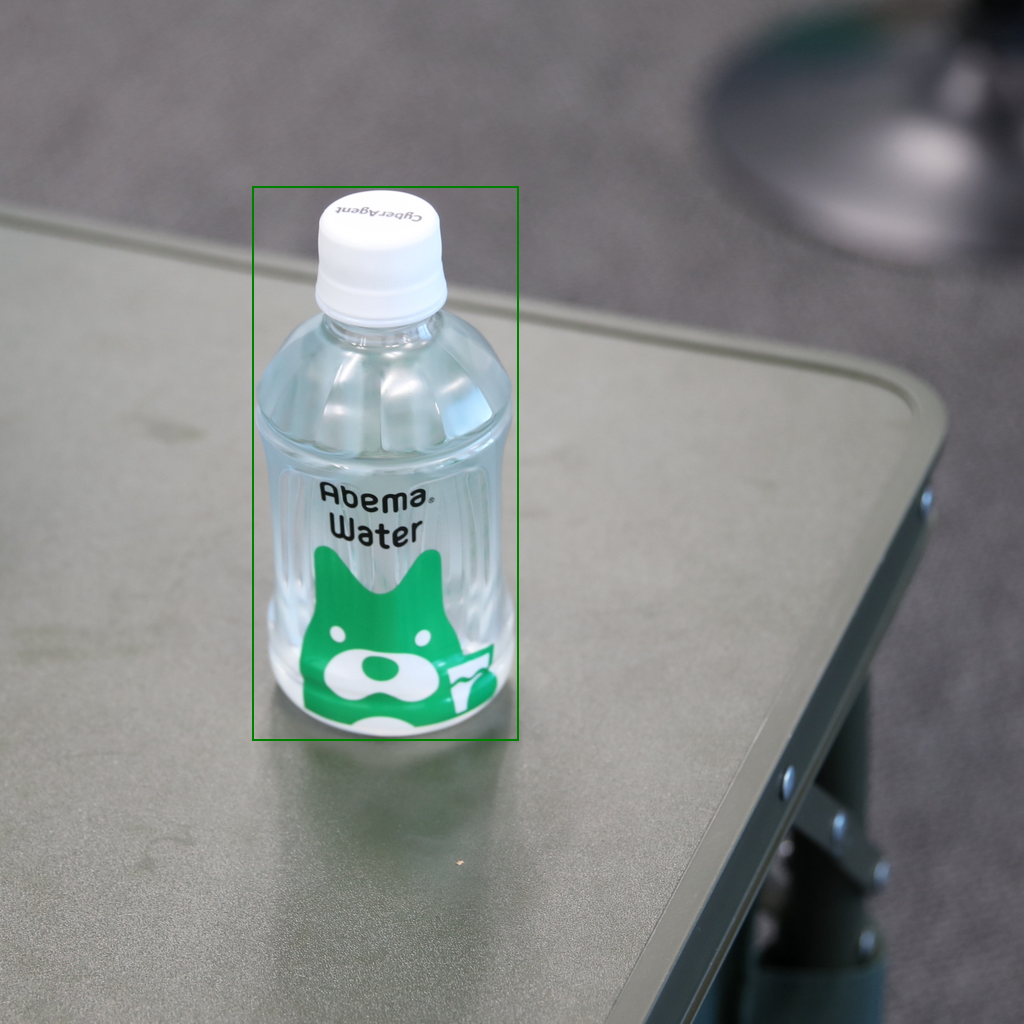

In [8]:
draw_bbox(image=image, bbox=text2bbox_output.bboxes[0])

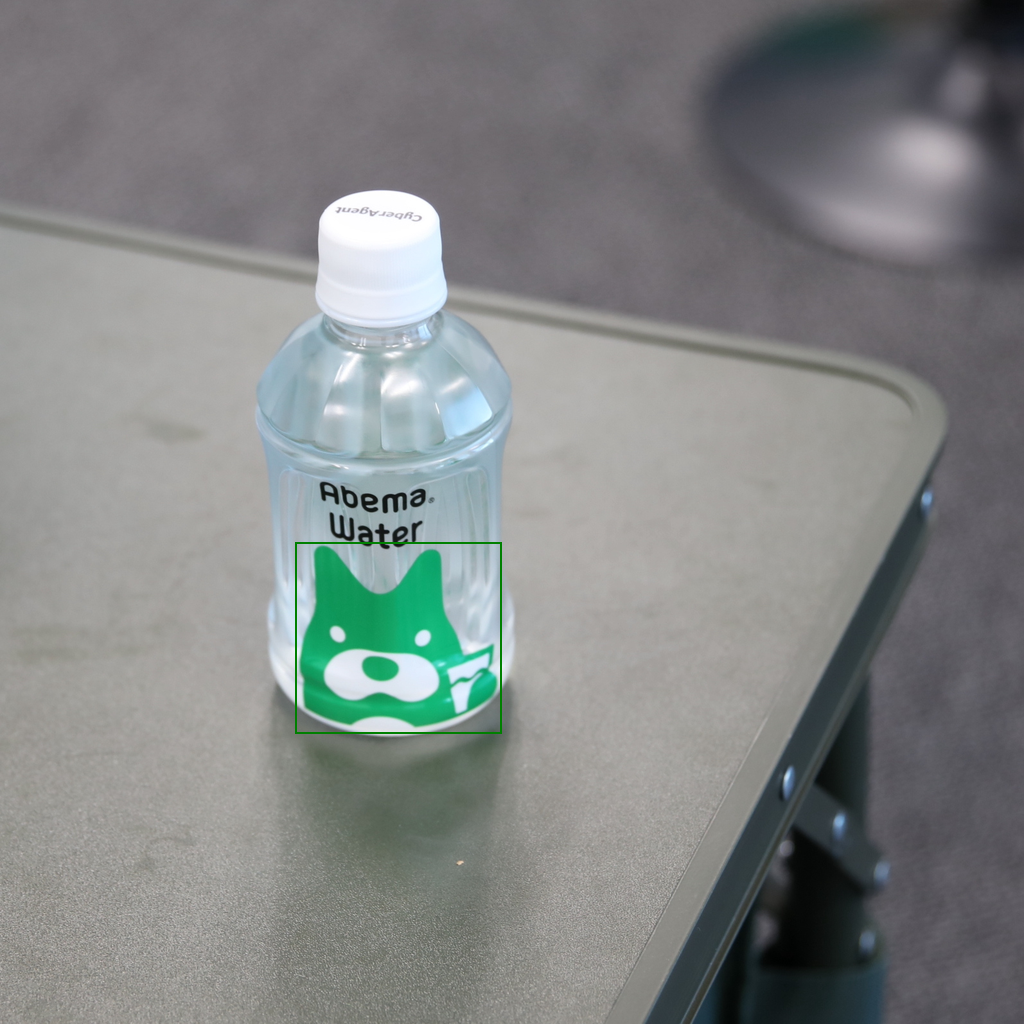

In [9]:
draw_bbox(image=image, bbox=text2bbox_output.bboxes[1])